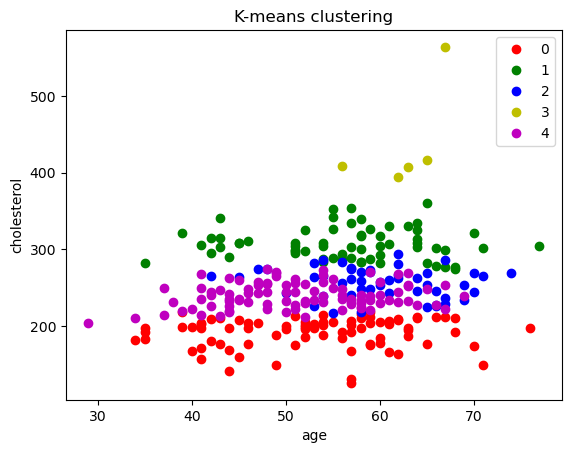

In [2]:
import pandas as pd
import numpy as np

import os
os.environ["OMP_NUM_THREADS"] = '1' #due to KMeans memory leak on windows

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

disease = pd.read_csv("heart-disease-dataset.csv")
disease = disease.apply(pd.to_numeric, errors='coerce') #convert all string to NaN ('?' entries)
disease = disease.dropna(how="any", axis=0) #axis 0 or 'index' for rows, drop all rows with NaN

X = disease.iloc[:,:].values

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
disease['cluster'] = y_kmeans

#print(disease)
#print(y_kmeans)

age = disease.columns.get_loc("age")
chol = disease.columns.get_loc("chol")

plt.plot(X[y_kmeans==0, age], X[y_kmeans==0, chol], "ro", label="0")
plt.plot(X[y_kmeans==1, age], X[y_kmeans==1, chol], "go", label="1")
plt.plot(X[y_kmeans==2, age], X[y_kmeans==2, chol], "bo", label="2")
plt.plot(X[y_kmeans==3, age], X[y_kmeans==3, chol], "yo", label="3")
plt.plot(X[y_kmeans==4, age], X[y_kmeans==4, chol], "mo", label="4")
plt.title('K-means clustering')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [4]:
sse = np.array([0.0]*10)
k = [i for i in range(1,11)]

#cant do anything about the error message
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit_predict(X)
    sse[i-1] = kmeans.inertia_
    
#print(sse, k)
#print('cant do anything about the above warning message, the code still runs')

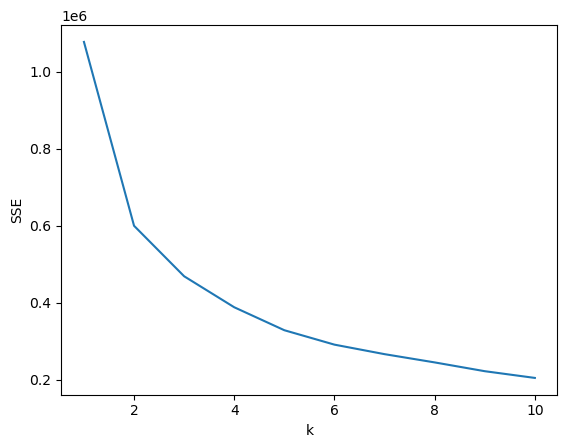

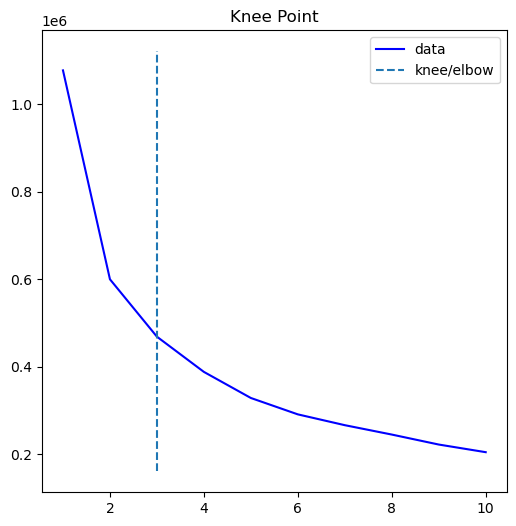

In [5]:
#print(sse, k)

from kneed import KneeLocator #after installing kneed

plt.plot(k, sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

elbow = KneeLocator(k, sse, curve='convex',direction='decreasing')
elbow.plot_knee()

In [6]:
print('The right k value is {}'.format(elbow.knee))

The right k value is 3


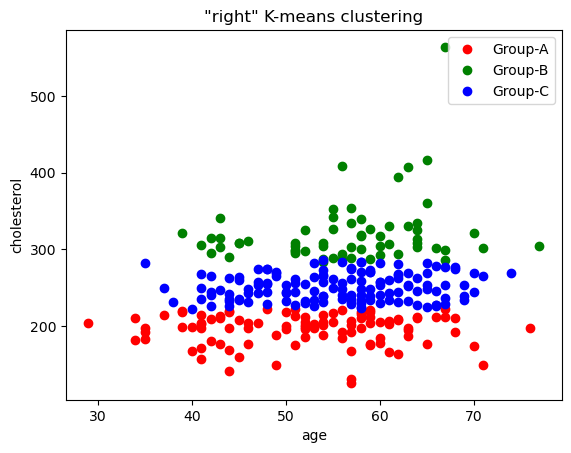

In [7]:
kmeans = KMeans(n_clusters=elbow.knee, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
disease['cluster'] = y_kmeans

age = disease.columns.get_loc("age")
chol = disease.columns.get_loc("chol")

plt.plot(X[y_kmeans==0, age], X[y_kmeans==0, chol], "ro", label="Group-A")
plt.plot(X[y_kmeans==1, age], X[y_kmeans==1, chol], "go", label="Group-B")
plt.plot(X[y_kmeans==2, age], X[y_kmeans==2, chol], "bo", label="Group-C")
plt.title('"right" K-means clustering')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

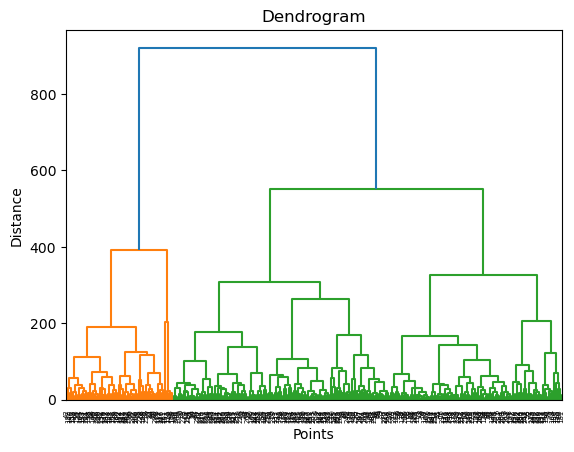

In [8]:
import scipy.cluster.hierarchy as sch

dg = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

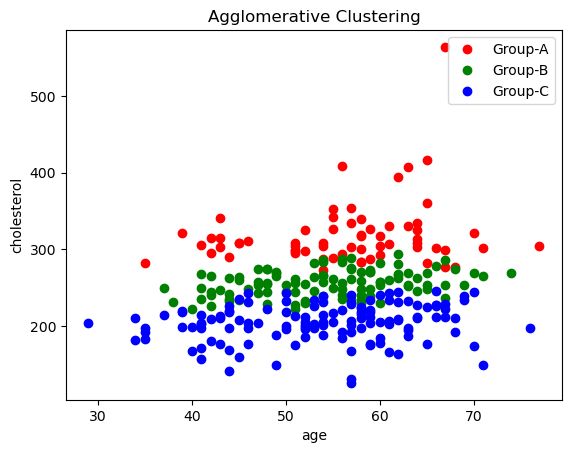

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=elbow.knee, affinity='euclidean', linkage='ward')
y_ac = ac.fit_predict(X)

age = disease.columns.get_loc("age")
chol = disease.columns.get_loc("chol")

plt.plot(X[y_ac==0, age], X[y_ac==0, chol], "ro", label="Group-A")
plt.plot(X[y_ac==1, age], X[y_ac==1, chol], "go", label="Group-B")
plt.plot(X[y_ac==2, age], X[y_ac==2, chol], "bo", label="Group-C")
plt.title('Agglomerative Clustering')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

ss_k = silhouette_score(X, y_kmeans)
ss_ac = silhouette_score(X, y_ac)

print('Silhouette Coefficient for k-means = {}'.format(round(ss_k, 3)))
print('Silhouette Coefficient for Agglomerative Clustering = {}'.format(round(ss_ac, 3)))
print()
print('This tells us that the k-means clustering is better for the given dataset as its Silhouette Score is closer to 1 (meaning the resulting clusters are further apart and more tightly packed)')

Silhouette Coefficient for k-means = 0.284
Silhouette Coefficient for Agglomerative Clustering = 0.239

This tells us that the k-means clustering is better for the given dataset as its Silhouette Score is closer to 1 (meaning the resulting clusters are further apart and more tightly packed)
